In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import StandardScaler

%matplotlib inline

### 1. Dataset

In [2]:
dataset = pd.read_csv("occupancy.csv")
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [3]:
X = dataset[['CO2', 'Light']].values
y = dataset[['Occupancy']].values

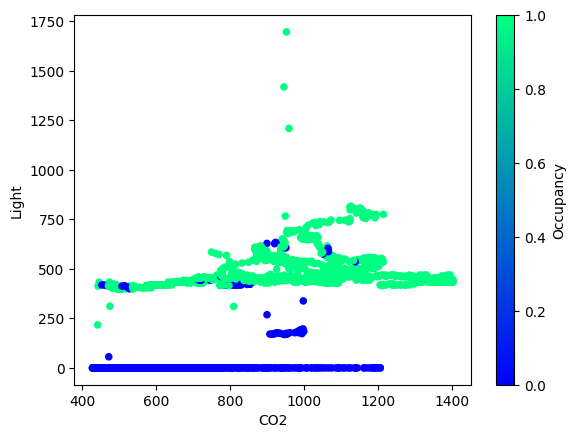

In [4]:
dataset.plot.scatter(x='CO2',y='Light', c='Occupancy', colormap='winter')
plt.show()

### 2. Modèle


In [5]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [7]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

W,b=initialisation(X)
modele(X, W, b)

### 3. Fonction Coût 

In [8]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient

In [9]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [10]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction

In [11]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 5. Modèle final

In [12]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

### Spliting dataset

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = X_train_scaled
X_test = X_test_scaled


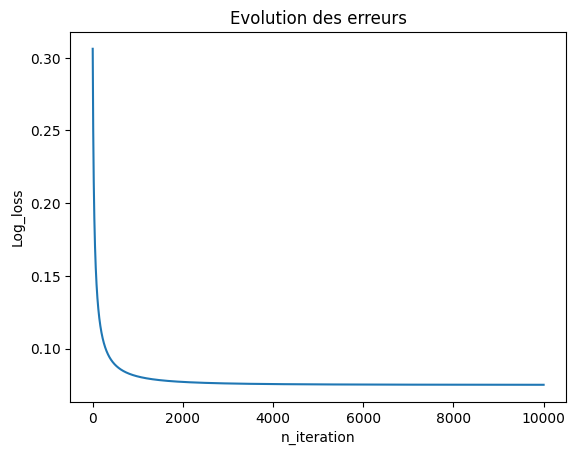

In [15]:
W, b = regression_logistique(X_train, y_train, learning_rate=0.1, n_iter=10000)


### 5. 1 Evaluation du modèle et Visualisation


In [16]:
from sklearn.metrics import accuracy_score

y_pred_test = predict(X_test, W, b)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy =", accuracy)


[[0.99472322]
 [0.99929939]
 [0.00124008]
 [0.99551211]
 [0.00382061]
 [0.00255363]
 [0.00119244]
 [0.00114879]
 [0.00123507]
 [0.99039919]
 [0.95499047]
 [0.95806403]
 [0.98792741]
 [0.00118681]
 [0.96767328]
 [0.00125978]
 [0.00145634]
 [0.00820719]
 [0.00126092]
 [0.00163902]
 [0.0011583 ]
 [0.00120106]
 [0.0013539 ]
 [0.0013013 ]
 [0.98493307]
 [0.00117073]
 [0.80141406]
 [0.00189454]
 [0.86675501]
 [0.97861548]
 [0.0012426 ]
 [0.99597276]
 [0.00126804]
 [0.97598796]
 [0.00115674]
 [0.00129225]
 [0.97892522]
 [0.95183238]
 [0.99403555]
 [0.97496911]
 [0.00137231]
 [0.00117089]
 [0.00118175]
 [0.00168502]
 [0.00145929]
 [0.00124176]
 [0.97976929]
 [0.0012612 ]
 [0.00120784]
 [0.00170103]
 [0.00128008]
 [0.85633299]
 [0.980166  ]
 [0.00138347]
 [0.00172532]
 [0.97651341]
 [0.0012163 ]
 [0.99399399]
 [0.9011504 ]
 [0.98930297]
 [0.00127784]
 [0.00183381]
 [0.00127577]
 [0.8828179 ]
 [0.00127147]
 [0.9709115 ]
 [0.96618467]
 [0.8549127 ]
 [0.0030678 ]
 [0.00133123]
 [0.00144654]
 [0.89

[0.13696323]
[False]
[0.21696342]
[False]
[0.88472775]
[ True]


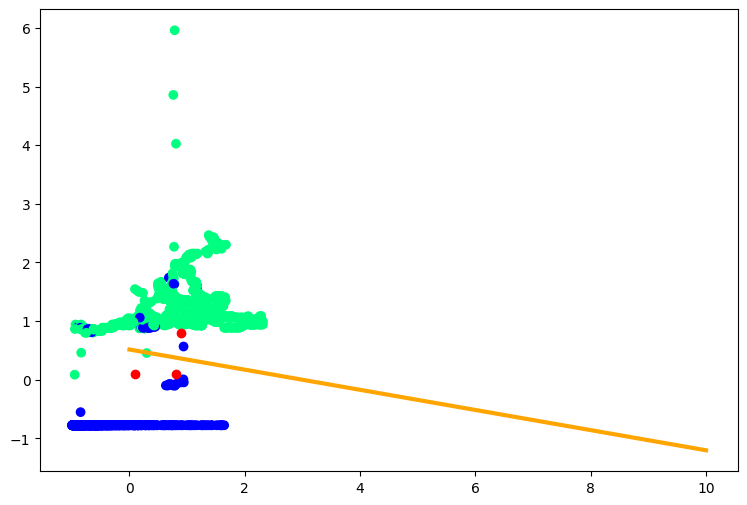

In [17]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(0, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([0.8,0.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [18]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
print(cm)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[[   0 1693]
 [   0  972]]


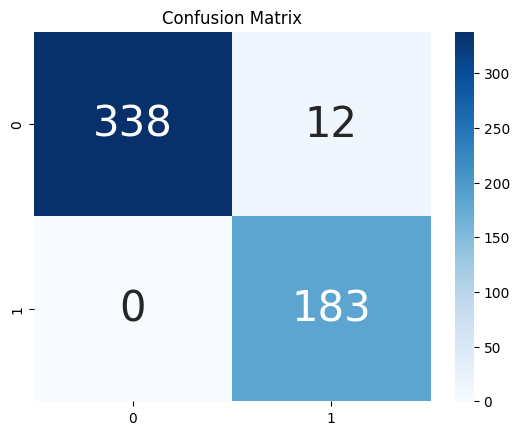

In [19]:
cm = confusion_matrix(y_test, y_pred_test)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()

# Question 3

In [20]:
X = dataset[['CO2', 'Light', 'Humidity']].values
y = dataset[['Occupancy']].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

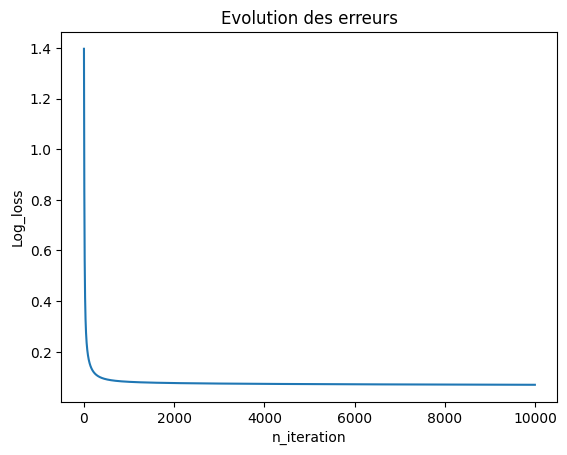

In [23]:
W, b = regression_logistique(X_train_scaled, y_train, learning_rate=0.1, n_iter=10000)


In [24]:
y_pred_test = predict(X_test_scaled, W, b)

accuracy = accuracy_score(y_test, y_pred_test)
print("Accuracy =", accuracy)

[[9.92847781e-01]
 [9.98487443e-01]
 [5.77130019e-04]
 [9.95028253e-01]
 [1.09756590e-02]
 [7.35780885e-03]
 [4.79391625e-04]
 [5.71907216e-04]
 [5.13378323e-04]
 [9.90777085e-01]
 [9.81965449e-01]
 [9.84794251e-01]
 [9.88800944e-01]
 [5.36030288e-04]
 [9.69796921e-01]
 [5.77199049e-04]
 [2.52648089e-03]
 [2.08626559e-02]
 [1.87739540e-03]
 [2.69319845e-03]
 [6.66067042e-04]
 [4.70157247e-04]
 [2.65415809e-03]
 [2.10509713e-03]
 [9.92858565e-01]
 [5.07082136e-04]
 [8.05461831e-01]
 [4.59030795e-03]
 [8.41697209e-01]
 [9.82156906e-01]
 [5.48128724e-04]
 [9.95663363e-01]
 [1.55038554e-03]
 [9.83933469e-01]
 [5.75359869e-04]
 [6.99466999e-04]
 [9.86573721e-01]
 [9.80838197e-01]
 [9.92906158e-01]
 [9.83963752e-01]
 [2.80558991e-03]
 [5.07035746e-04]
 [6.96518776e-04]
 [3.16227326e-03]
 [8.90430383e-04]
 [1.95168487e-03]
 [9.86266604e-01]
 [1.50653624e-03]
 [4.75243029e-04]
 [3.35175882e-03]
 [6.02641919e-04]
 [8.92802760e-01]
 [9.90716552e-01]
 [2.83570191e-03]
 [3.54123522e-03]
 [9.848080

## Tracer la frontière de décision

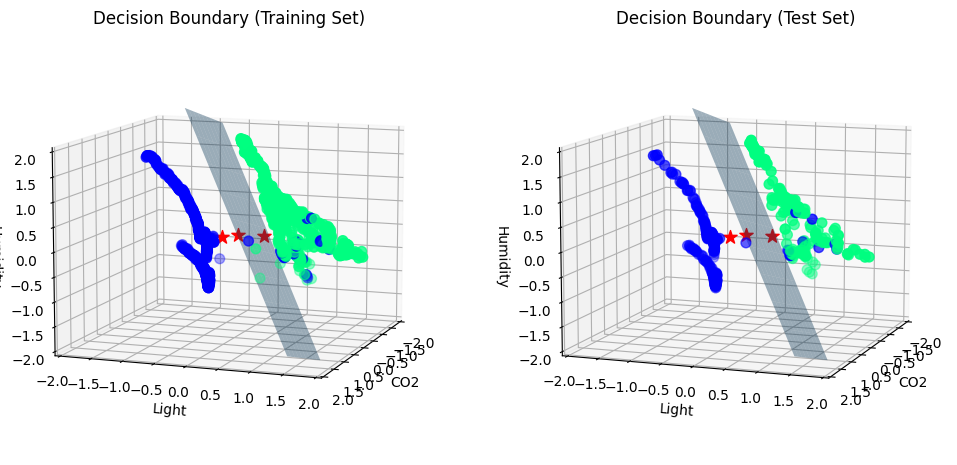

In [25]:
# %matplotlib notebook
x1 = np.linspace(-0.3, 1.3, 10)
x2 = np.linspace(-0.3, 1.3, 10)
x1, x2 = np.meshgrid(x1, x2)
x3_train = (-W[0]*x1 - W[1]*x2 - b) / W[2]
x3_test = (-W[0]*x1 - W[1]*x2 - b) / W[2]

# Visualiser le dataset et la frontière de décision en 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(121, projection='3d')
ax.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], X_train_scaled[:, 2], c=y_train, cmap='winter', s=50)  # Utilisez X_train_scaled
ax.plot_surface(x1, x2, x3_train, alpha=0.4)

# Prédire la classe de nouveaux éléments pour l'ensemble d'entraînement
new_1 = np.array([0.1, 0.1, 0.1])
new_2 = np.array([0.8, 0.1, 0.2])
new_3 = np.array([0.9, 0.8, 0.3])
ax.scatter(new_1[0], new_1[1], new_1[2], c='r', marker='*', s=100)
ax.scatter(new_2[0], new_2[1], new_2[2], c='r', marker='*', s=100)
ax.scatter(new_3[0], new_3[1], new_3[2], c='r', marker='*', s=100)

ax.set_title('Decision Boundary (Training Set)')
ax.set_xlabel('CO2')
ax.set_ylabel('Light')
ax.set_zlabel('Humidity')

# Définir les limites des axes pour zoomer
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Définir la position de la caméra pour un meilleur angle de vue
ax.view_init(elev=10, azim=20)

# Visualiser le dataset et la frontière de décision en 3D pour l'ensemble de test
ax = fig.add_subplot(122, projection='3d')
ax.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], X_test_scaled[:, 2], c=y_test, cmap='winter', s=50)  # Utilisez X_test_scaled
ax.plot_surface(x1, x2, x3_test, alpha=0.4)

# Prédire la classe de nouveaux éléments pour l'ensemble de test
ax.scatter(new_1[0], new_1[1], new_1[2], c='r', marker='*', s=100)
ax.scatter(new_2[0], new_2[1], new_2[2], c='r', marker='*', s=100)
ax.scatter(new_3[0], new_3[1], new_3[2], c='r', marker='*', s=100)

ax.set_title('Decision Boundary (Test Set)')
ax.set_xlabel('CO2')
ax.set_ylabel('Light')
ax.set_zlabel('Humidity')

# Définir les limites des axes pour zoomer
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])

# Définir la position de la caméra pour un meilleur angle de vue
ax.view_init(elev=10, azim=20)

plt.show()


[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


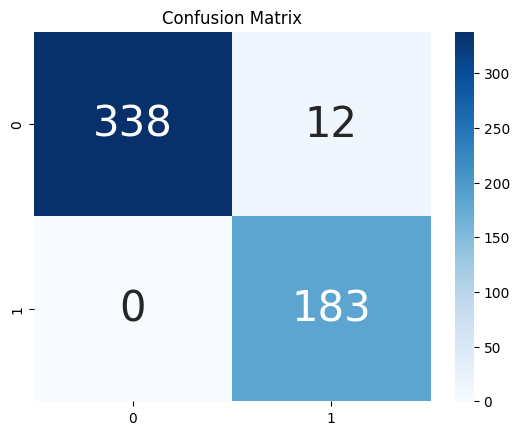

In [26]:
y_pred = predict(X, W, b)
cm = confusion_matrix(y, y_pred)
cm = confusion_matrix(y_test, y_pred_test)
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()